# Use Customer_Segmentation Notebook Template

In [1]:
import pandas as pd
import random 
import numpy as np

In [5]:
df = pd.read_csv('/data/Input/customers_data.csv')

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Date
0,C10001,40.900749,Very high,95.40,0.00,95.4,0.000000,Very low,Very low,Very low,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,1-1-2022
1,C10002,3202.467416,Very high,0.00,0.00,0.0,6442.945483,Very low,Very low,Very low,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,1-1-2022
2,C10003,2495.148862,Very high,773.17,773.17,0.0,0.000000,Very high,Very high,Very low,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,1-1-2022
3,C10004,1666.670542,High,1499.00,1499.00,0.0,205.788017,Very low,Very low,Very low,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.000000,1-1-2022
4,C10005,817.714335,Very high,16.00,16.00,0.0,0.000000,Very low,Very low,Very low,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,1-1-2022


In [7]:
cust_id_unique = df.drop_duplicates(subset=['CUST_ID'])

In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'Date'],
      dtype='object')

In [9]:
non_numeric_values = df['CREDIT_LIMIT'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())

df.loc[non_numeric_values, 'CREDIT_LIMIT'] = 0

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].astype(float)

In [10]:
employment_status = ['Employed', 'Self-Employed', 'Unemployed', 'Retired']
marital_status = ['Single', 'Married', 'Divorced', 'Widowed']
bank_account_type = ['Savings', 'Checking', 'Credit', 'Business']
region = ['North', 'South', 'East', 'West']
age_group = ['Young', 'Adult', 'Middle-aged', 'Senior']
Gender = ['Male', 'Female']
Occupation = ['Professional', 'Managerial','Skilled Worker','Unskilled Worker', 'Student']
Dependents = ["None", "One", "Two", "Three or more"]

# Age

In [11]:
def assign_age(row):
    if row['BALANCE'] < 1000 and row['PURCHASES'] < 500:
        return random.randint(18, 25)
    elif row['BALANCE'] < 3000 and row['PURCHASES'] < 2000:
        return random.randint(26, 35)
    elif row['BALANCE'] < 5000 and row['PURCHASES'] < 5000:
        return random.randint(36, 50)
    else:
        return random.randint(51, 70)

cust_id_unique['AGE'] = cust_id_unique.apply(assign_age, axis=1)

<ipython-input-11-87e13028ea40>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['AGE'] = cust_id_unique.apply(assign_age, axis=1)


# Employment status

In [12]:
cust_id_unique['EMPLOYMENT_STATUS'] = [random.choice(employment_status) for _ in range(len(cust_id_unique))]

<ipython-input-12-4ac9b202ae1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['EMPLOYMENT_STATUS'] = [random.choice(employment_status) for _ in range(len(cust_id_unique))]


In [13]:
cust_id_unique.groupby('EMPLOYMENT_STATUS')['BALANCE'].agg(['mean', 'min', 'max'])

,mean,min,max
EMPLOYMENT_STATUS,,,
Employed,1562.927747,0.0,19043.13856
Retired,1554.966128,0.0,15532.33972
Self-Employed,1558.565813,0.0,18495.55855
Unemployed,1580.738857,0.0,16259.44857


In [14]:
cust_id_unique['CREDIT_LIMIT'] = cust_id_unique['CREDIT_LIMIT'].astype('float')

<ipython-input-14-7463a585392d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['CREDIT_LIMIT'] = cust_id_unique['CREDIT_LIMIT'].astype('float')


In [15]:
cust_id_unique[['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PAYMENTS']].describe()

,BALANCE,CREDIT_LIMIT,PURCHASES,PAYMENTS
count,8950.000000,8949.000000,8950.000000,8950.000000
mean,1564.474828,4494.449450,1003.204834,1733.143852
std,2081.531879,3638.815725,2136.634782,2895.063757
min,0.000000,50.000000,0.000000,0.000000
25%,128.281915,1600.000000,39.635000,383.276166
50%,873.385231,3000.000000,361.280000,856.901546
75%,2054.140036,6500.000000,1110.130000,1901.134317
max,19043.138560,30000.000000,49039.570000,50721.483360


In [16]:
cust_id_unique[['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PAYMENTS']]

,BALANCE,CREDIT_LIMIT,PURCHASES,PAYMENTS
0,40.900749,1000.0,95.40,201.802084
1,3202.467416,7000.0,0.00,4103.032597
2,2495.148862,7500.0,773.17,622.066742
3,1666.670542,7500.0,1499.00,0.000000
4,817.714335,1200.0,16.00,678.334763
...,...,...,...,...
8945,28.493517,1000.0,291.12,325.594462
8946,19.183215,1000.0,300.00,275.861322
8947,23.398673,1000.0,144.40,81.270775
8948,13.457564,500.0,0.00,52.549959


Matplotlib created a temporary cache directory at /tmp/matplotlib-p8ivtbmf because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<Axes: ylabel='Frequency'>

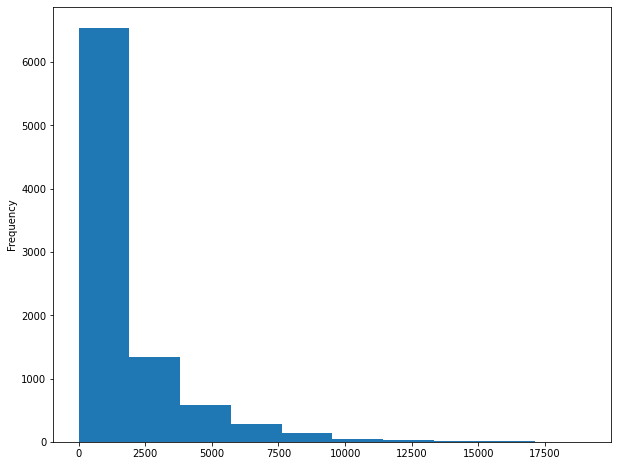

In [17]:
cust_id_unique['BALANCE'].plot.hist(figsize=(10, 8))

<Axes: ylabel='Frequency'>

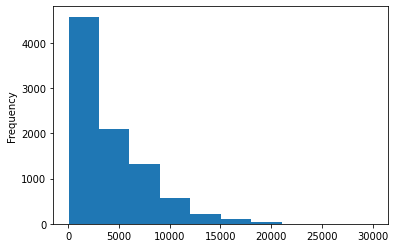

In [18]:
cust_id_unique['CREDIT_LIMIT'].astype('float').plot.hist()

<Axes: ylabel='Frequency'>

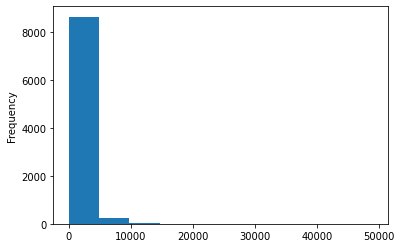

In [19]:
cust_id_unique['PURCHASES'].astype('float').plot.hist()

<Axes: ylabel='Frequency'>

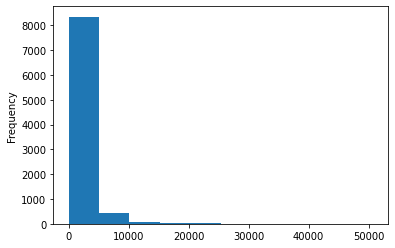

In [20]:
cust_id_unique['PAYMENTS'].astype('float').plot.hist()

In [21]:
def assign_employment_status(row):
    if row['AGE'] > 60:
        return 'Retired'
    elif row['BALANCE'] > 5000 and row['CREDIT_LIMIT'] > 10000:
        return 'Self-Employed'
    elif row['AGE'] >= 25 and row['AGE'] <= 60 and row['BALANCE'] > 1000 and row['PAYMENTS'] > 1000:
        return 'Employed'
    else:
        return 'Unemployed'


cust_id_unique['EMPLOYMENT_STATUS'] = cust_id_unique.apply(assign_employment_status, axis=1)
cust_id_unique.groupby('EMPLOYMENT_STATUS')['BALANCE'].agg(['mean', 'min', 'max'])

<ipython-input-21-aa188f4deab9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['EMPLOYMENT_STATUS'] = cust_id_unique.apply(assign_employment_status, axis=1)


,mean,min,max
EMPLOYMENT_STATUS,,,
Employed,2931.881542,1001.543878,10571.411070
Retired,6107.192346,204.329381,16115.596400
Self-Employed,8346.395560,5036.870531,19043.138560
Unemployed,756.290058,0.000000,9164.724752


# Marital Status

In [22]:
cust_id_unique['MARITAL_STATUS'] = [random.choice(marital_status) for _ in range(len(cust_id_unique))]

<ipython-input-22-ced525508f6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['MARITAL_STATUS'] = [random.choice(marital_status) for _ in range(len(cust_id_unique))]


In [23]:
def assign_marital_status(row):
    if row['AGE'] < 30 and row['BALANCE'] < 1000:
        return 'Single'
    elif row['AGE'] >= 30 and row['AGE'] <= 60 and row['BALANCE'] > 2000:
        return 'Married'
    elif row['AGE'] >= 35 and row['AGE'] <= 60 and row['BALANCE'] > 1000 and row['PAYMENTS'] < 500:
        return 'Divorced'
    elif row['AGE'] > 60:
        return 'Widowed'
    else:
        return 'Single'

cust_id_unique['MARITAL_STATUS'] = cust_id_unique.apply(assign_marital_status, axis=1)

<ipython-input-23-8040bb6eb4a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['MARITAL_STATUS'] = cust_id_unique.apply(assign_marital_status, axis=1)


# Gender

In [24]:
cust_id_unique['GENDER'] = [random.choice(region) for _ in range(len(cust_id_unique))]

<ipython-input-24-6de73ed04d07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['GENDER'] = [random.choice(region) for _ in range(len(cust_id_unique))]


# DEPENDENTS

In [25]:
cust_id_unique['DEPENDENTS'] = [random.choice(region) for _ in range(len(cust_id_unique))]


def assign_dependents(row):
    if row['AGE'] < 25 or row['AGE'] > 60:
        return 'No Dependents'
    elif 25 <= row['AGE'] < 35 and row['BALANCE'] < 2000:
        return 'One Dependent'
    elif 35 <= row['AGE'] < 50 and row['BALANCE'] < 5000:
        return 'Two Dependents'
    elif 50 <= row['AGE'] <= 60 and row['BALANCE'] >= 5000:
        return 'Three or More Dependents'
    else:
        return 'No Dependents'



cust_id_unique['DEPENDENTS'] = cust_id_unique.apply(assign_dependents, axis=1)

<ipython-input-25-999dc04e8465>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['DEPENDENTS'] = [random.choice(region) for _ in range(len(cust_id_unique))]
<ipython-input-25-999dc04e8465>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['DEPENDENTS'] = cust_id_unique.apply(assign_dependents, axis=1)


# OCCUPATION

In [26]:
def assign_occupation(row):
    if row['AGE'] < 25:
        return 'Student'
    elif row['AGE'] >= 25 and row['AGE'] < 35 and row['BALANCE'] > 1000:
        return 'Professional'
    elif row['AGE'] >= 35 and row['AGE'] < 45 and row['BALANCE'] > 3000:
        return 'Managerial'
    elif row['AGE'] >= 30 and row['AGE'] < 55 and row['BALANCE'] > 2000:
        return 'Skilled Worker'
    elif row['AGE'] >= 18 and row['AGE'] < 60 and row['BALANCE'] < 2000:
        return 'Unskilled Worker'
    elif row['AGE'] > 60:
        return 'Retired'
    else:
        return 'Unskilled Worker'

cust_id_unique['OCCUPATION'] = cust_id_unique.apply(assign_occupation, axis=1)

<ipython-input-26-8d33b7adbf2c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['OCCUPATION'] = cust_id_unique.apply(assign_occupation, axis=1)


In [27]:
def assign_bank_account_type(row):
    if row['BALANCE'] < 1000 and row['CREDIT_LIMIT'] < 5000:
        return 'Savings'
    elif row['BALANCE'] < 3000 and row['CREDIT_LIMIT'] < 10000:
        return 'Checking'
    elif row['BALANCE'] < 5000 and row['CREDIT_LIMIT'] < 15000:
        return 'Credit'
    else:
        return 'Business'

cust_id_unique['BANK_ACCOUNT_TYPE'] = cust_id_unique.apply(assign_bank_account_type, axis=1)

<ipython-input-27-29c4fae3b71a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_unique['BANK_ACCOUNT_TYPE'] = cust_id_unique.apply(assign_bank_account_type, axis=1)


In [28]:
cust_id_unique

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Date,AGE,EMPLOYMENT_STATUS,MARITAL_STATUS,GENDER,DEPENDENTS,OCCUPATION,BANK_ACCOUNT_TYPE
0,C10001,40.900749,Very high,95.40,0.00,95.40,0.000000,Very low,Very low,Very low,...,139.509787,0.000000,1-1-2022,18,Unemployed,Single,North,No Dependents,Student,Savings
1,C10002,3202.467416,Very high,0.00,0.00,0.00,6442.945483,Very low,Very low,Very low,...,1072.340217,0.222222,1-1-2022,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
2,C10003,2495.148862,Very high,773.17,773.17,0.00,0.000000,Very high,Very high,Very low,...,627.284787,0.000000,1-1-2022,32,Unemployed,Married,South,No Dependents,Professional,Checking
3,C10004,1666.670542,High,1499.00,1499.00,0.00,205.788017,Very low,Very low,Very low,...,NaN,0.000000,1-1-2022,29,Unemployed,Single,South,One Dependent,Professional,Checking
4,C10005,817.714335,Very high,16.00,16.00,0.00,0.000000,Very low,Very low,Very low,...,244.791237,0.000000,1-1-2022,23,Unemployed,Single,East,No Dependents,Student,Savings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,Very high,291.12,0.00,291.12,0.000000,Very high,Very low,Very high,...,48.886365,0.500000,1-1-2022,19,Unemployed,Single,East,No Dependents,Student,Savings
8946,C19187,19.183215,Very high,300.00,0.00,300.00,0.000000,Very high,Very low,Very high,...,NaN,0.000000,1-1-2022,23,Unemployed,Single,West,No Dependents,Student,Savings
8947,C19188,23.398673,Very high,144.40,0.00,144.40,0.000000,Very high,Very low,High,...,82.418369,0.250000,1-1-2022,22,Unemployed,Single,East,No Dependents,Student,Savings
8948,C19189,13.457564,Very high,0.00,0.00,0.00,36.558778,Very low,Very low,Very low,...,55.755628,0.250000,1-1-2022,25,Unemployed,Single,East,One Dependent,Unskilled Worker,Savings


In [29]:
df.shape

(152150, 18)

In [30]:
cust_id_unique.shape

(8950, 25)

In [31]:
cust_id_unique.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'Date', 'AGE',
       'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'GENDER', 'DEPENDENTS',
       'OCCUPATION', 'BANK_ACCOUNT_TYPE'],
      dtype='object')

In [32]:
merged_df = pd.merge(df, cust_id_unique[['CUST_ID', 'AGE', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'GENDER', 'DEPENDENTS', 'OCCUPATION', 'BANK_ACCOUNT_TYPE']], how='outer', on='CUST_ID')

In [33]:
merged_df[merged_df['CUST_ID'] == 'C10001']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Date,AGE,EMPLOYMENT_STATUS,MARITAL_STATUS,GENDER,DEPENDENTS,OCCUPATION,BANK_ACCOUNT_TYPE
0,C10001,40.900749,Very high,95.400,0.0,95.400,0.0,Very low,Very low,Very low,...,139.509787,0.0,1-1-2022,18,Unemployed,Single,North,No Dependents,Student,Savings
1,C10001,39.469223,High,98.739,0.0,101.124,0.0,Very low,Very low,Very low,...,149.27547209,0.0,1-2-2022,18,Unemployed,Single,North,No Dependents,Student,Savings
2,C10001,42.332275,Very high,87.768,0.0,88.722,0.0,Very low,Very low,Very low,...,129.74410190999998,0.0,1-11-2023,18,Unemployed,Single,North,No Dependents,Student,Savings
3,C10001,37.219682,High,100.170,0.0,103.986,0.0,Very low,Very low,Very low,...,132.53429764999998,0.0,1-8-2023,18,Unemployed,Single,North,No Dependents,Student,Savings
4,C10001,37.219682,High,89.676,0.0,98.739,0.0,Very low,Very low,Very low,...,150.67056996,0.0,1-5-2023,18,Unemployed,Single,North,No Dependents,Student,Savings
5,C10001,37.219682,Very high,100.170,0.0,86.814,0.0,Very low,Very low,Very low,...,144.39262954499998,0.0,1-2-2023,18,Unemployed,Single,North,No Dependents,Student,Savings
6,C10001,43.354794,Very high,98.739,0.0,92.061,0.0,Very low,Very low,Very low,...,146.48527635,0.0,1-11-2023,18,Unemployed,Single,North,No Dependents,Student,Savings
7,C10001,42.332275,Very high,101.124,0.0,103.986,0.0,Very low,Very low,Very low,...,150.67056996,0.0,1-8-2023,18,Unemployed,Single,North,No Dependents,Student,Savings
8,C10001,43.763801,Very high,90.630,0.0,100.170,0.0,Very low,Very low,Very low,...,131.13919977999998,0.0,1-5-2023,18,Unemployed,Single,North,No Dependents,Student,Savings
9,C10001,42.332275,High,103.986,0.0,88.722,0.0,Very low,Very low,Very low,...,126.95390617,0.0,1-2-2023,18,Unemployed,Single,North,No Dependents,Student,Savings


In [34]:
merged_df[merged_df['CUST_ID'] == 'C10002']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Date,AGE,EMPLOYMENT_STATUS,MARITAL_STATUS,GENDER,DEPENDENTS,OCCUPATION,BANK_ACCOUNT_TYPE
17,C10002,3202.467416,Very high,0.0,0.0,0.0,6442.945483,Very low,Very low,Very low,...,1072.340217,0.222222,1-1-2022,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
18,C10002,2978.294697,Very high,0.0,0.0,0.0,6958.381122,Very low,Very low,Very low,...,1125.95722785,0.211111,1-3-2022,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
19,C10002,3314.553776,Very high,0.0,0.0,0.0,6056.368754,Very low,Very low,Very low,...,1136.6806300199999,0.206666,1-12-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
20,C10002,3010.319371,Very high,0.0,0.0,0.0,6765.092757,Very low,Very low,Very low,...,1109.8721245949998,0.204444,1-9-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
21,C10002,3490.689483,Very high,0.0,0.0,0.0,6893.951667,Very low,Very low,Very low,...,1109.8721245949998,0.202222,1-6-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
22,C10002,3458.664809,Very high,0.0,0.0,0.0,6668.448575,Very low,Very low,Very low,...,1034.808309405,0.211111,1-3-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
23,C10002,3314.553776,Very high,0.0,0.0,0.0,6958.381122,Very low,Very low,Very low,...,975.82959747,0.202222,1-12-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
24,C10002,3490.689483,Very high,0.0,0.0,0.0,6120.798209,Very low,Very low,Very low,...,997.2764018099999,0.204444,1-9-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
25,C10002,2914.245349,Very high,0.0,0.0,0.0,6120.798209,Very low,Very low,Very low,...,1136.6806300199999,0.208889,1-6-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit
26,C10002,2914.245349,Very high,0.0,0.0,0.0,5863.080390,Very low,Very low,Very low,...,1007.9998039799999,0.214444,1-3-2023,50,Employed,Married,West,No Dependents,Skilled Worker,Credit


In [35]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [36]:
merged_df['Date'].value_counts()

Date
2023-01-11    11935
2023-01-08    11935
2023-01-05    11935
2023-01-02    11935
2023-01-13    11931
2023-01-10    11931
2023-01-04    11931
2023-01-12    11931
2023-01-09    11931
2023-01-06    11931
2023-01-03    11931
2023-01-07    11931
2022-01-01     8950
2022-01-02        1
2022-01-04        1
2022-01-03        1
2022-01-05        1
2022-01-06        1
2022-01-07        1
2022-01-08        1
2022-01-09        1
2022-01-10        1
2022-01-11        1
2022-01-12        1
2022-01-13        1
Name: count, dtype: int64

In [37]:
merged_df['Date']

0        2022-01-01
1        2022-01-02
2        2023-01-11
3        2023-01-08
4        2023-01-05
            ...    
152145   2023-01-02
152146   2023-01-11
152147   2023-01-08
152148   2023-01-05
152149   2023-01-02
Name: Date, Length: 152150, dtype: datetime64[ns]

# Make the customer id unique
# update the datetime values 

In [39]:
total_rows = merged_df.shape[0]

In [40]:
monthly_dates = pd.date_range(start='2022-04-01', end='2024-05-01', freq='MS')

random_distribution = np.random.randint(5000, 8000, size=len(monthly_dates))

adjustment_factor = merged_df.shape[0] / random_distribution.sum()
adjusted_distribution = (random_distribution * adjustment_factor).astype(int)

adjusted_distribution[-1] += total_rows - adjusted_distribution.sum()

random_dates = np.concatenate([np.repeat(date, count) for date, count in zip(monthly_dates, adjusted_distribution)])

np.random.shuffle(random_dates)

shuffled_random_data = pd.DataFrame({'Date': random_dates})

shuffled_random_data.value_counts()

Date      
2022-12-01    6982
2022-07-01    6946
2022-05-01    6887
2022-11-01    6869
2023-09-01    6802
2024-05-01    6797
2023-08-01    6701
2023-07-01    6426
2024-03-01    6315
2024-04-01    6291
2023-12-01    6058
2023-05-01    5919
2023-11-01    5884
2022-10-01    5724
2024-01-01    5713
2023-03-01    5568
2022-09-01    5561
2023-10-01    5554
2023-01-01    5421
2023-06-01    5090
2022-08-01    5089
2022-06-01    4940
2023-04-01    4836
2024-02-01    4793
2022-04-01    4599
2023-02-01    4385
Name: count, dtype: int64

In [41]:
merged_df['Date'] = shuffled_random_data['Date']

In [42]:
value_counts = merged_df['Date'].value_counts()

In [43]:
value_counts.reset_index().sort_values(by='Date', ascending=True).set_index('Date')

,count
Date,
2022-04-01,4599
2022-05-01,6887
2022-06-01,4940
2022-07-01,6946
2022-08-01,5089
2022-09-01,5561
2022-10-01,5724
2022-11-01,6869
2022-12-01,6982


In [44]:
merged_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'Date', 'AGE',
       'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'GENDER', 'DEPENDENTS',
       'OCCUPATION', 'BANK_ACCOUNT_TYPE'],
      dtype='object')

In [45]:
merged_df.shape

(152150, 25)

In [46]:
df_bank_details = merged_df[['CUST_ID','BANK_ACCOUNT_TYPE','BALANCE','BALANCE_FREQUENCY','CREDIT_LIMIT']]

In [47]:
df_bank_details['CUST_ID'].nunique()

8950